The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../TextFiles/moviereviews2.tsv', sep='\t')

In [4]:
df

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...
...,...,...
5995,pos,"Of the three remakes of this plot, I like them..."
5996,neg,Poor Whoopi Goldberg. Imagine her at a friend'...
5997,neg,"Honestly before I watched this movie, I had he..."
5998,pos,This movie is essentially shot on a hand held ...


In [5]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
%config Completer.use_jedi = False

In [11]:
df[df['review'].str.isspace()]

,label,review


In [13]:
df['label'].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [15]:
X = df['review']
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [98]:
model = MultinomialNB()

In [99]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', model)
                ])

In [100]:
param_grid = {'clf__alpha': np.logspace(0,-9,20)}

In [101]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [102]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': array([1.00000000e+00, 3.35981829e-01, 1.12883789e-01, 3.79269019e-02,
       1.27427499e-02, 4.28133240e-03, 1.43844989e-03, 4.83293024e-04,
       1.62377674e-04, 5.45559478e-05, 1.83298071e-05, 6.15848211e-06,
       2.06913808e-06, 6.95192796e-07, 2.33572147e-07, 7.84759970e-08,
       2.63665090e-08, 8.85866790e-09, 2.97635144e-09, 1.00000000e-09])},
             scoring='accuracy')

In [104]:
# grid.best_estimator_.get_params()

In [105]:
y_preds = grid.predict(X_test)

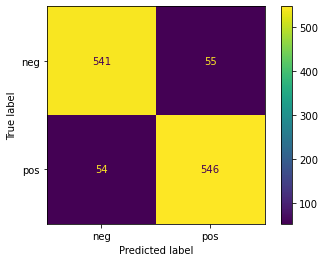

In [106]:
plot_confusion_matrix(grid, X_test, y_test)

In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.91      0.91      0.91       596
         pos       0.91      0.91      0.91       600

    accuracy                           0.91      1196
   macro avg       0.91      0.91      0.91      1196
weighted avg       0.91      0.91      0.91      1196



In [54]:
from sklearn.linear_model import LogisticRegression

In [108]:
model = LogisticRegression()

In [109]:
param_grid = {'clf__penalty': ['l1', 'l2', 'elasticnet'],
             'clf__C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
             'clf__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
             'clf__solver': ['saga'],
             'clf__max_iter': [1000]}

In [112]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', model)
                ])

In [113]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [114]:
grid.fit(X_train,y_train)

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is '

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'e

C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
C:\Users\kaile\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'clf__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'clf__max_iter': [1000],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__solver': ['saga']},
             scoring='accuracy')

In [117]:
grid.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(C=10, l1_ratio=0.7, max_iter=1000,
                                    solver='saga'))])

In [118]:
y_preds = grid.predict(X_test)

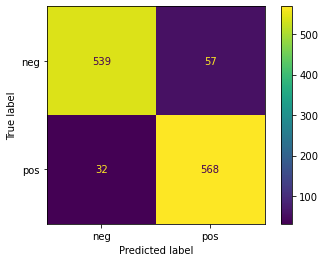

In [119]:
plot_confusion_matrix(grid, X_test, y_test)

In [120]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.94      0.90      0.92       596
         pos       0.91      0.95      0.93       600

    accuracy                           0.93      1196
   macro avg       0.93      0.93      0.93      1196
weighted avg       0.93      0.93      0.93      1196



In [121]:
from sklearn.svm import SVC

In [122]:
model = SVC()

In [131]:
param_grid = {'clf__C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
             'clf__kernel': ['linear','rbf'],
             'clf__gamma': ['scale', 'auto']}

In [132]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', model)
                ])

In [133]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [134]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [136]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()), ('clf', SVC(C=10))],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'clf': SVC(C=10),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'clf__C': 10,
 'clf__break_ties': False,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'scale',
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__

In [137]:
y_preds = grid.predict(X_test)

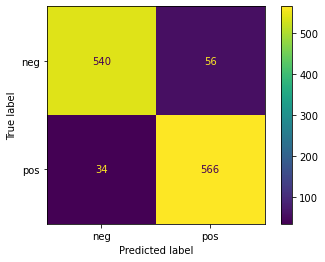

In [138]:
plot_confusion_matrix(grid, X_test, y_test)

In [139]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.94      0.91      0.92       596
         pos       0.91      0.94      0.93       600

    accuracy                           0.92      1196
   macro avg       0.93      0.92      0.92      1196
weighted avg       0.93      0.92      0.92      1196



In [140]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
model = RandomForestClassifier()

In [152]:
param_grid = {'clf__n_estimators': [25, 50, 75, 100, 200, 300],
             'clf__max_depth': [3,4,5,6,7,8],
             'clf__max_features': ['auto', 'log2'],
             'clf__bootstrap': ['True', 'False'],
             'clf__criterion': ['gini', 'entropy']}

In [153]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', model)
                ])

In [154]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [155]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(n_jobs=12))]),
             param_grid={'clf__bootstrap': ['True', 'False'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 4, 5, 6, 7, 8],
                         'clf__max_features': ['auto', 'log2'],
                         'clf__n_estimators': [25, 50, 75, 100, 200, 300]},
             scoring='accuracy')

In [156]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()),
  ('clf',
   RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=8,
                          n_estimators=200, n_jobs=12))],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'clf': RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=8,
                        n_estimators=200, n_jobs=12),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'clf__

In [157]:
y_preds = grid.predict(X_test)

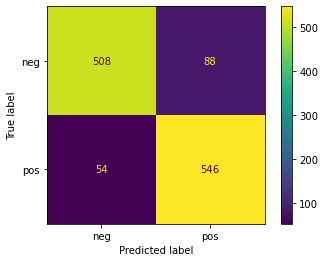

In [158]:
plot_confusion_matrix(grid, X_test, y_test)

In [159]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         neg       0.90      0.85      0.88       596
         pos       0.86      0.91      0.88       600

    accuracy                           0.88      1196
   macro avg       0.88      0.88      0.88      1196
weighted avg       0.88      0.88      0.88      1196

